In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs

In [3]:
#Our data is not using the default encoding (utf-8) so we make sure to specify the correct encoding when reading the file
data = pd.read_csv('volcdata.csv', encoding = 'unicode_escape', engine ='python')
data = data.dropna(subset=['Longitude'])
data = data.dropna(subset=["No Affected"])

In [4]:
print(np.array(data['Longitude']))

['75.316W' ' 10.288E' ' 115.508E' '112.308E' '120.35 E' '152.203E'
 '90.880W' '105.423E' '120.994E' '110.446E' '123.7 E' '110.4 E' '130.3 E'
 '112.3 E' '98.392' '62.14 W' '-76.03' '112.308' '112.9 E' '-78.442'
 '152.203' '40.82' '145.037' '127.33' '106 E' '-89.63' '-78.436' '86.7 W'
 '130.3 E' '110.26 E' '98.392' '-72.12' '72.58 W' '-78.442' '123.685'
 '124.79 E' '123.685' '86.7 W' '145.037' '145.037' '152.203' '72.58 W'
 '71.85 W' '15.004' '90.60 W' '130.3 E' '121 E' '103.60 W' '98.62 W'
 '175.57 E' '90.6 W' '84.70 E' '90.60 W' '110.4 E' '103.60 W' '152.2 E'
 '9.17 E' '78.6 W' '103.62 W' '87 W' '86.7 W' '-90.601' '139.12' '-98.622'
 '-78.442' '-103.62' '168.346' '-78.442' '40.46' '-78.442' '-76.03'
 '145.037' '168.346' '-70.9' '123.685' '112.308' '-72.65' '124.05'
 '-78.442' '-90.601' '-72.12' '123.685' '124.05' '124.05' '98.392'
 '120.993' '-78.436' '-78.442' '123.685']


In [6]:
def convert_longitude(longitude):
    
    if longitude[-1]=='W':
        numeric_part= -float(longitude[:-1].strip())
    elif longitude[-1] == 'E':
        numeric_part= float(longitude[:-1].strip())
    else:
         numeric_part= float(longitude.strip())
            
    # Normalize the longitude value to be between -180 and 180
    while numeric_part > 180:
        numeric_part -= 360
    while numeric_part < -180:
        numeric_part += 360

    return numeric_part

def convert_latitude(latitude):
    # Strip any extra spaces and split by non-numeric characters
    if latitude[-1]=='S':
        numeric_part= -float(latitude[:-1].strip())
    elif latitude[-1] == 'N':
        numeric_part= float(latitude[:-1].strip())
    else:
         numeric_part= float(latitude.strip())
    
    # Normalize the latitude value to be between -90 and 90
    numeric_part = max(min(numeric_part, 90), -90)

    return numeric_part

In [7]:
lon = [convert_longitude(lon) for lon in data['Longitude']]
print(lon)

lat = [convert_latitude(lat) for lat in data['Latitude']]
print(lat)

aff = list(data["No Affected"]/1000)
print(aff)

[-75.316, 10.288, 115.508, 112.308, 120.35, 152.203, -90.88, 105.423, 120.994, 110.446, 123.7, 110.4, 130.3, 112.3, 98.392, -62.14, -76.03, 112.308, 112.9, -78.442, 152.203, 40.82, 145.037, 127.33, 106.0, -89.63, -78.436, -86.7, 130.3, 110.26, 98.392, -72.12, -72.58, -78.442, 123.685, 124.79, 123.685, -86.7, 145.037, 145.037, 152.203, -72.58, -71.85, 15.004, -90.6, 130.3, 121.0, -103.6, -98.62, 175.57, -90.6, 84.7, -90.6, 110.4, -103.6, 152.2, 9.17, -78.6, -103.62, -87.0, -86.7, -90.601, 139.12, -98.622, -78.442, -103.62, 168.346, -78.442, 40.46, -78.442, -76.03, 145.037, 168.346, -70.9, 123.685, 112.308, -72.65, 124.05, -78.442, -90.601, -72.12, 123.685, 124.05, 124.05, 98.392, 120.993, -78.436, -78.442, 123.685]
[4.895, 6.441, -8.342, -7.937, 15.13, -4.21, 14.473, -6.102, 14.002, -7.54, 13.3, -7.5, 32.75, -7.9, 3.17, 16.45, 2.93, -7.93, -8.1, -1.467, -4.271, 12.17, -4.08, 0.8, -6.3, 13.852846, -0.677, 12.5, 32.75, -7.32, 3.17, -40.59, -45.54, -1.467, 13.257, 1.36, 13.257, 12.5, -4.08

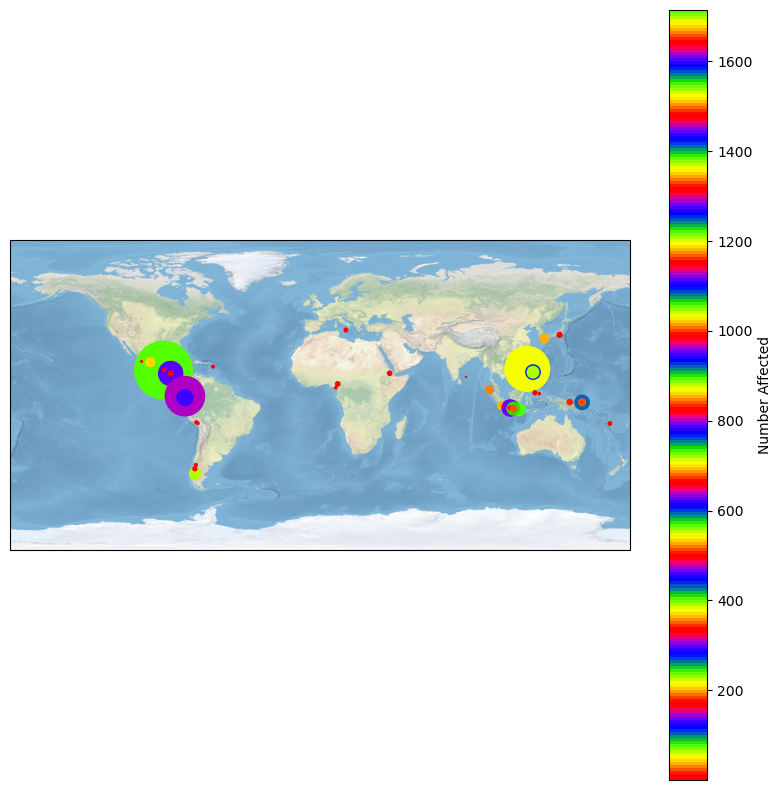

In [19]:
#Now we can plot our data, we create a new figure and cartopy projection
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
#ax.coastlines()

cmap = plt.get_cmap('prism')
norm = plt.Normalize(vmin=min(aff), vmax=max(aff))

sc = ax.scatter(lon,lat, aff, transform=ccrs.PlateCarree(), c=aff, cmap=cmap, norm=norm, marker='o')
#ax.scatter(lon,lat, death, transform=ccrs.PlateCarree(),c='r')

cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Number Affected')

plt.show()